Importing the python tools to be used.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data with the **Pandas** module

In [40]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates= ['date'], index_col=['date'])
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


Extracting valid data from the values column which fall under the (2.5 - 97.5%) quartile. 

In [41]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

Vizualing the data by plotting the year against the page views (values)

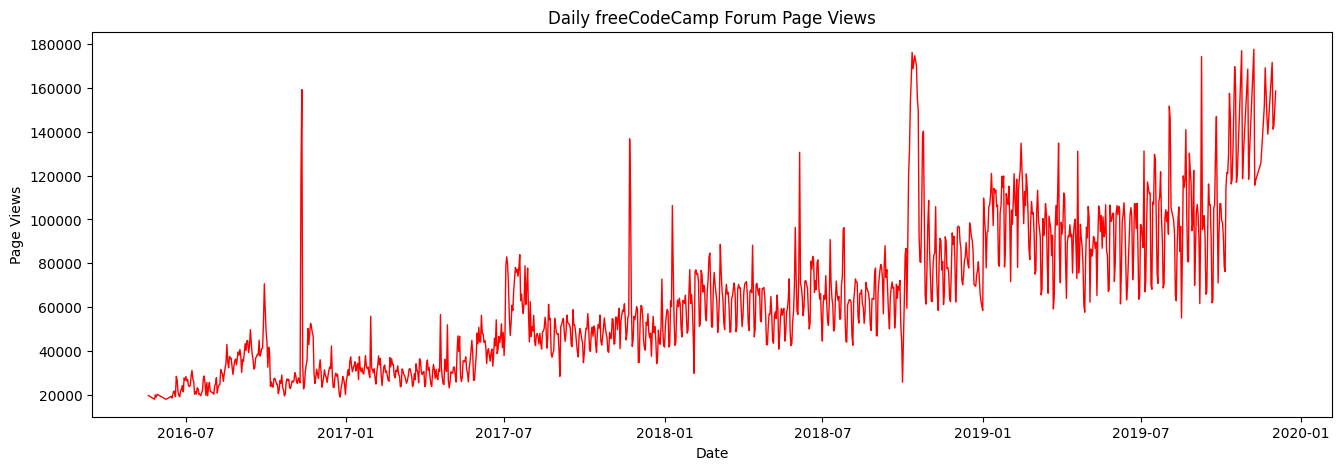

In [42]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(df.index, df['value'], 'r', linewidth=1)
ax.set_title('Daily freeCodeCamp Forum Page Views')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
plt.show()

Getting our different month and year series and thier correlating values

In [ ]:
df['month'] = df.index.month
df['year'] = df.index.year

Setting the bar plot values in order and getting the average values for each year
* Which also involves setting the for each month

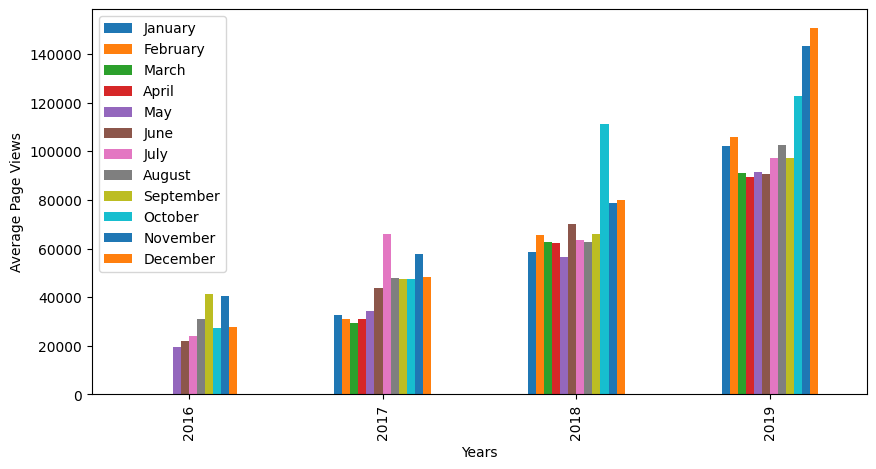

In [45]:
df_bar = df.groupby(['year', 'month'])['value'].mean()
df_bar = df_bar.unstack()
df_bar.plot.bar(legend= True, figsize=(10,5), ylabel='Average Page Views', xlabel = 'Years')
plt.legend(['January', 'February', 'March', 'April', 'May', "June", 'July', 'August', 'September', 'October', 'November', 'December'])

In [ ]:
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)


Preparing the data for box plotting

In [48]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Grabbing the date and the datetime in the month and the year

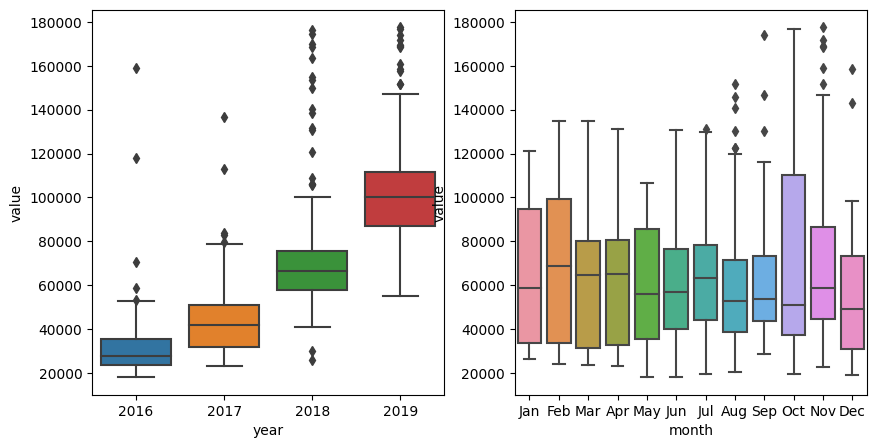

In [54]:
df_box['month_num'] = df_box['date'].dt.month
df_box= df_box.sort_values('month_num')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax= axes[0])
axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax= axes[1])
plt.show()

Labelling the x and y axis

In [53]:
axes[0].set_title('Year_wise Box plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

axes[1].set_title('Month_wise Box plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')
plt.show()